In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [124]:
# read csv file
imported_data = pd.read_csv('merged.csv')
imported_data = imported_data.dropna()

In [125]:
# separate dependent/independent variables
date_columns = [col for col in imported_data.columns if col.startswith('1/') or col.startswith('2/') or col.startswith('3/') or col.startswith('4/') or col.startswith('5/') or col.startswith('6/') or col.startswith('7/') or col.startswith('8/') or col.startswith('9/') or col.startswith('10/') or col.startswith('11/') or col.startswith('12/')]
dependent_var = ['house_price']
independent_vars = ['num_beds', 'num_baths', 'area', 'tax_ass_val', 'latitude', 'longitude'] + date_columns

In [126]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    imported_data[independent_vars],
    imported_data[dependent_var],
    test_size=0.2,
    random_state=42
)

In [127]:
import pickle

# create linear regression model object
model = LinearRegression()
# train the model on the training data
model.fit(X_train, y_train)
# make predictions on the test data
y_pred = model.predict(X_test)
# evaluate the model's preformance on the testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse:.2f}')
print(f'R2 score: {r2:.2f}')

with open('real_estate_model.pickle', 'wb') as f:
    pickle.dump(model, f)

Mean squared error: 15159204592.17
R2 score: 0.94


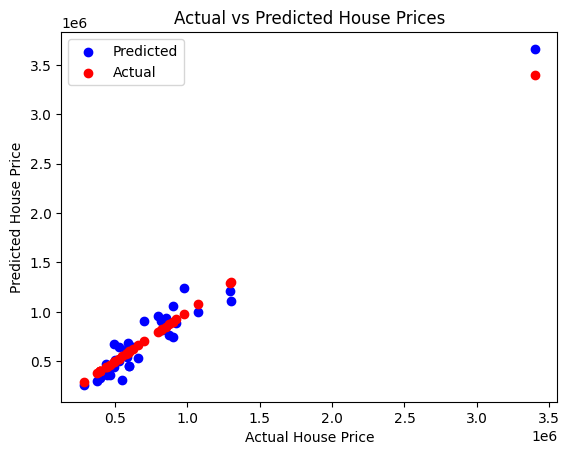

In [128]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Plot predicted and actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

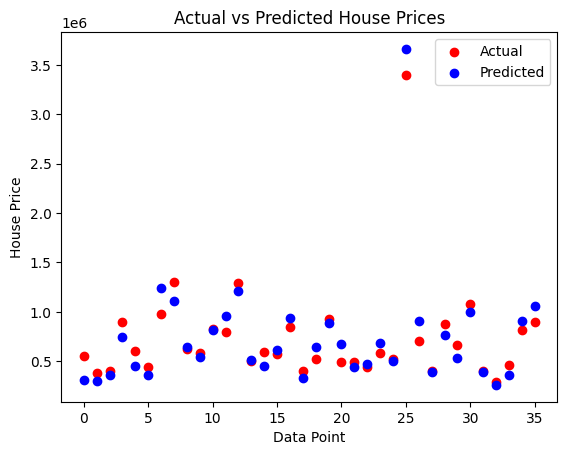

In [129]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Flatten the arrays
y_test = y_test.values.flatten()
y_pred = y_pred.flatten()

# Pair actual and predicted values
data = list(zip(y_test, y_pred))

# Plot actual and predicted values
plt.scatter(range(len(data)), [actual for actual, _ in data], color='red', label='Actual')
plt.scatter(range(len(data)), [predicted for _, predicted in data], color='blue', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

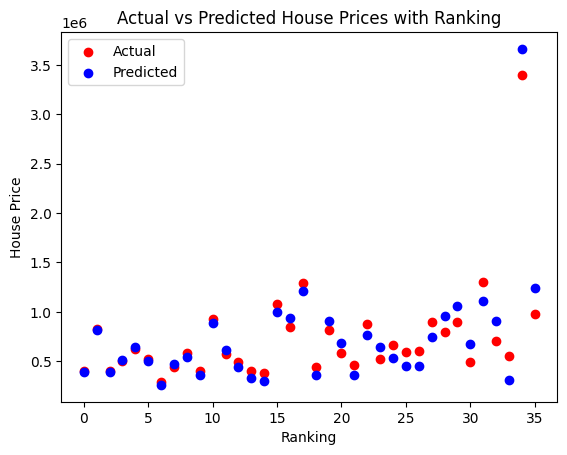

In [130]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Flatten the arrays
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Calculate the absolute difference between actual and predicted values
diff = np.abs(y_test - y_pred)

# Pair actual, predicted, and difference values
data = list(zip(y_test, y_pred, diff))

# Sort the data based on the difference
data_sorted = sorted(data, key=lambda x: x[2])

# Plot actual and predicted values with ranking based on difference
plt.scatter(range(len(data_sorted)), [actual for actual, _, _ in data_sorted], color='red', label='Actual')
plt.scatter(range(len(data_sorted)), [predicted for _, predicted, _ in data_sorted], color='blue', label='Predicted')
plt.xlabel('Ranking')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices with Ranking')
plt.legend()
plt.show()


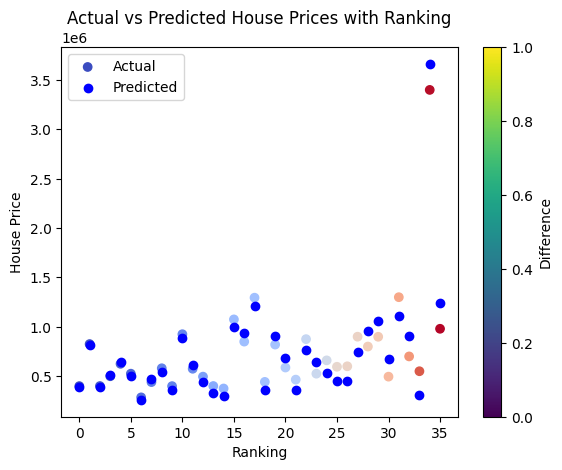

In [131]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Flatten the arrays
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Calculate the absolute difference between actual and predicted values
diff = np.abs(y_test - y_pred)

# Pair actual, predicted, and difference values
data = list(zip(y_test, y_pred, diff))

# Sort the data based on the difference
data_sorted = sorted(data, key=lambda x: x[2])

# Create a color map for the differences
cmap = plt.get_cmap('coolwarm')

# Plot actual and predicted values with ranking based on difference
plt.scatter(range(len(data_sorted)), [actual for actual, _, _ in data_sorted], c=[diff for _, _, diff in data_sorted],
            cmap=cmap, label='Actual')
plt.scatter(range(len(data_sorted)), [predicted for _, predicted, _ in data_sorted], color='blue', label='Predicted')
plt.xlabel('Ranking')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices with Ranking')
plt.legend()

# Add color bar legend for the difference values
cbar = plt.colorbar()
cbar.set_label('Difference')

plt.show()


In [132]:
# Pair actual, predicted, and difference values
data = list(zip(y_test, y_pred, diff))

# Sort the data based on the difference
data_sorted = sorted(data, key=lambda x: x[2])
data_sorted

[(399000.0, 393860.0, 5140.0),
 (825000.0, 816756.0, 8244.0),
 (399900.0, 385964.0, 13936.0),
 (499000.0, 513148.0, 14148.0),
 (625000.0, 642596.0, 17596.0),
 (525000.0, 504332.0, 20668.0),
 (285000.0, 259212.0, 25788.0),
 (440000.0, 474748.0, 34748.0),
 (580000.0, 542068.0, 37932.0),
 (399000.0, 359556.0, 39444.0),
 (925000.0, 883860.0, 41140.0),
 (575000.0, 617708.0, 42708.0),
 (495000.0, 436500.0, 58500.0),
 (400000.0, 333183.0, 66817.0),
 (375000.0, 300708.0, 74292.0),
 (1075000.0, 994452.0, 80548.0),
 (850000.0, 933768.0, 83768.0),
 (1295000.0, 1210196.0, 84804.0),
 (442000.0, 355468.0, 86532.0),
 (820000.0, 908698.0, 88698.0),
 (587500.0, 684452.0, 96952.0),
 (464900.0, 363740.0, 101160.0),
 (875000.0, 761636.0, 113364.0),
 (525000.0, 643636.0, 118636.0),
 (660000.0, 536004.0, 123996.0),
 (595000.0, 448900.0, 146100.0),
 (600000.0, 448468.0, 151532.0),
 (899900.0, 748212.0, 151688.0),
 (800000.0, 959732.0, 159732.0),
 (899000.0, 1062588.0, 163588.0),
 (495000.0, 672980.0, 177980.